In [1]:
from google.colab import drive
drive.mount('/gdrive')
import pathlib

import os

print(os.getcwd())
%cd ..
%cd gdrive
%cd My Drive
# %cd MAJOR PROJECT
#data_root = pathlib.Path("/gdrive/My Drive/MAJOR PROJECT")

#%cd ./gdrive/My Drive/MAJOR PROJECT
print(os.getcwd())

Mounted at /gdrive
/content
/
/gdrive
/gdrive/My Drive
/gdrive/My Drive


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
from tensorflow.keras import layers

import os
import time 

from matplotlib import pyplot as plt
from IPython import display

from scipy.io import loadmat

import numpy as np

import pandas as pd

import sklearn.preprocessing
import sklearn
import numpy as np
import cv2
from PIL import Image

In [95]:
data=pd.read_excel('data/GW_data.xlsx')
data.head()

,Name,Namecode,Latitude,Longitude,Month,Year,January,February,March,April,May,June,July,August,September,October,November,December,Rain,Temp,Altitude,River,Aquifer,Soil,soil_depth,Alluvium,Basalt,Laterite,Limestone,Sandstone_conglomerate,Shale,Clay,Loam,Rocky,Sand,SD_10.0,SD_17.5,SD_37.5,SD_50.0,evapotranspiration,Linear,Spline,Level,Population,Area,Density
0,Asamibya,0,22.97,69.45,Jan,2009,1,0,0,0,0,0,0,0,0,0,0,0,0.0,24,65,400,Basalt,Sand,50.0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,23.08842,11.300,11.300000,11.30,3118,27.0611,140.0
1,Asamibya,0,22.97,69.45,Feb,2009,0,1,0,0,0,0,0,0,0,0,0,0,0.0,26,65,400,Basalt,Sand,50.0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,22.34521,11.595,9.399830,NaN,3118,27.0611,140.0
2,Asamibya,0,22.97,69.45,Mar,2009,0,0,1,0,0,0,0,0,0,0,0,0,0.0,29,65,400,Basalt,Sand,50.0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,26.96629,11.890,9.462509,NaN,3118,27.0611,140.0
3,Asamibya,0,22.97,69.45,Apr,2009,0,0,0,1,0,0,0,0,0,0,0,0,0.0,32,65,400,Basalt,Sand,50.0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,32.72775,12.185,10.738934,NaN,3118,27.0611,140.0
4,Asamibya,0,22.97,69.45,May,2009,0,0,0,0,1,0,0,0,0,0,0,0,0.0,32,65,400,Basalt,Sand,50.0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,36.38367,12.480,12.480000,12.48,3118,27.0611,140.0


In [4]:
Features=['Namecode','Year','January','February', 'March',	'April',	'May',	'June',	'July',	'August',	'September',	'October',	'November',	'December',
          'Rain',	'Temp',	'Altitude',	'River', 'Alluvium',	'Basalt',	'Laterite',	'Limestone',	'Sandstone_conglomerate',	'Shale',	'Clay',	'Loam',	'Rocky',	'Sand',	
          'SD_10.0',	'SD_17.5',	'SD_37.5',	'SD_50.0',	'evapotranspiration',	'Population']
Base=['Namecode','January','February', 'March',	'April',	'May',	'June',	'July',	'August',	'September',	'October',	'November',	'December',
      'Rain','Temp','Altitude','evapotranspiration']
LI_level=['Linear']
SI_level=['Spline']
level=['Level']

In [96]:
basetest_x=data[data.Level.isna()][Base]
fulltest_x=data[data.Level.isna()][Features]
test_y=data[data.Level.isna() ][SI_level]

basetrain_x=data[data.Level.notna()][Base]
fulltrain_x=data[data.Level.notna()][Features]
train_y=data[data.Level.notna() ][SI_level]


fulldata_x=data[Features][:]
fulldata_y=data[SI_level][:]

In [8]:
print(basetrain_x.describe())
print(fulltest_x.describe())


          Namecode      January  ...     Altitude  evapotranspiration
count  1613.000000  1613.000000  ...  1613.000000         1613.000000
mean     27.057037     0.247985  ...    58.871668           45.932066
std      15.507717     0.431977  ...    41.441133           27.525150
min       0.000000     0.000000  ...    10.000000           17.514670
25%      13.000000     0.000000  ...    25.000000           31.016420
50%      27.000000     0.000000  ...    45.000000           36.383670
75%      40.000000     0.000000  ...    90.000000           38.522840
max      53.000000     1.000000  ...   180.000000           96.158940

[8 rows x 17 columns]
          Namecode         Year  ...  evapotranspiration     Population
count  3751.000000  3751.000000  ...         3751.000000    3751.000000
mean     27.090642  2013.910690  ...           49.715308   13684.315916
std      15.482559     3.105568  ...           25.157127   38682.452512
min       0.000000  2009.000000  ...           17.514670   

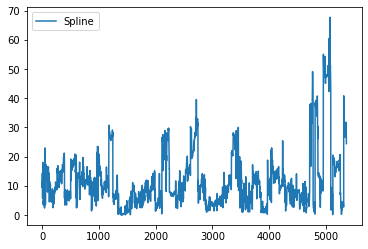

In [11]:
gwl=data[SI_level].fillna(value=0)
gwl.plot()

# Result of Baseline Random forest

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

reg = RandomForestRegressor().fit(basetrain_x, train_y)
print("base features: ",reg.score(basetest_x,test_y))

ypred=reg.predict(basetest_x)

print("MSE base features: ",mean_squared_error(test_y.values.flatten(),ypred))

print("Correlation cofficient base: \n",np.corrcoef(test_y.values.flatten(),ypred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


base features:  0.9113329916872076
MSE base features:  8.481729201727441
Correlation cofficient base: 
 [[1.         0.95511228]
 [0.95511228 1.        ]]


# Result of Fullfeatures Random forest

In [66]:
reg = RandomForestRegressor().fit(fulltrain_x, train_y)
print("full features: ",reg.score(fulltest_x,test_y))

ypred=reg.predict(fulltest_x)

print("MSE full features: ",mean_squared_error(test_y.values.flatten(),ypred))

print("Correlation cofficient full: \n",np.corrcoef(test_y.values.flatten(),ypred))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


full features:  0.9563020131194405
MSE full features:  4.180072142211556
Correlation cofficient full: 
 [[1.         0.97813557]
 [0.97813557 1.        ]]


In [87]:
print(reg.score(fulltest_x,test_y))
print(ypred)

0.9563020131194405
[10.9278 10.4713 11.3337 ... 28.5286 29.0407 29.8952]


# PLot of true vs predicted groundwater level randomforest

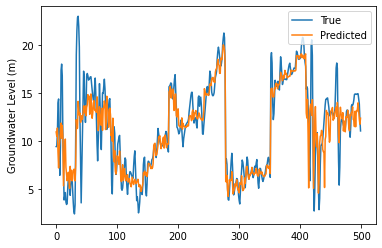

In [93]:
plt.plot(test_y.values.flatten()[:500])
plt.plot(ypred[:500],)
plt.legend(["True", "Predicted"], loc ="upper right")
plt.ylabel('Groundwater Level (m)')
plt.show()

# Result of locations if trained on model with other locations

In [69]:
print("Bhuj " )
bhuj=data[data.Namecode==3]
X=bhuj[bhuj.Level.notna()][Features]
Y=bhuj[bhuj.Level.notna()][SI_level]

print("R2: ",reg.score(X,Y))
yp=reg.predict(X)
print("Mse: ",mean_squared_error(Y.values.flatten(),yp))
print("Correlation cofficient full: \n",np.corrcoef(Y.values.flatten(),yp))


print("\ngdham " )
gdham=data[data.Namecode==17]
X=gdham[gdham.Level.notna()][Features]
Y=gdham[gdham.Level.notna()][SI_level]

print("R2: ",reg.score(X,Y))
yp=reg.predict(X)
print("Mse: ",mean_squared_error(Y.values.flatten(),yp))
print("Correlation cofficient full: \n",np.corrcoef(Y.values.flatten(),yp))


print("\nmundra " )
mundra=data[data.Namecode==39]
X=mundra[mundra.Level.notna()][Features]
Y=mundra[mundra.Level.notna()][SI_level]

print("R2: ",reg.score(X,Y))
yp=reg.predict(X)
print("Mse: ",mean_squared_error(Y.values.flatten(),yp))
print("Correlation cofficient full: \n",np.corrcoef(Y.values.flatten(),yp))

Bhuj 
R2:  0.9205154613079971
Mse:  0.2996215499999992
Correlation cofficient full: 
 [[1.         0.97563191]
 [0.97563191 1.        ]]

gdham 
R2:  0.9256146868194475
Mse:  0.265983065652175
Correlation cofficient full: 
 [[1.         0.98742085]
 [0.98742085 1.        ]]

mundra 
R2:  0.9058734475766783
Mse:  0.18249858289473755
Correlation cofficient full: 
 [[1.         0.96654333]
 [0.96654333 1.        ]]


# Result of locations if model is trained individually

In [70]:
print("Bhuj " )
bhuj=data[data.Namecode==3]
X=bhuj[bhuj.Level.isna()][Features]
Y=bhuj[bhuj.Level.isna()][SI_level]
reg1=RandomForestRegressor().fit(X,Y)
X=bhuj[bhuj.Level.notna()][Features]
Y=bhuj[bhuj.Level.notna()][SI_level]
print("R2: ",reg1.score(X,Y))
yp=reg1.predict(X)
print("Mse: ",mean_squared_error(Y.values.flatten(),yp))
print("Correlation cofficient full: \n",np.corrcoef(Y.values.flatten(),yp))


print("\ngdham " )
gdham=data[data.Namecode==17]
X=gdham[gdham.Level.isna()][Features]
Y=gdham[gdham.Level.isna()][SI_level]
reg1=RandomForestRegressor().fit(X,Y)
X=gdham[gdham.Level.notna()][Features]
Y=gdham[gdham.Level.notna()][SI_level]
print("R2: ",reg1.score(X,Y))
yp=reg1.predict(X)
print("Mse: ",mean_squared_error(Y.values.flatten(),yp))
print("Correlation cofficient full: \n",np.corrcoef(Y.values.flatten(),yp))


print("\nmundra " )
mundra=data[data.Namecode==39]
X=mundra[mundra.Level.isna()][Features]
Y=mundra[mundra.Level.isna()][SI_level]
reg1=RandomForestRegressor().fit(X,Y)
X=mundra[mundra.Level.notna()][Features]
Y=mundra[mundra.Level.notna()][SI_level]
print("R2: ",reg1.score(X,Y))
yp=reg1.predict(X)
print("Mse: ",mean_squared_error(Y.values.flatten(),yp))
print("Correlation cofficient full: \n",np.corrcoef(Y.values.flatten(),yp))

Bhuj 
R2:  0.6585936385808735
Mse:  1.2869509576527294
Correlation cofficient full: 
 [[1.         0.84386935]
 [0.84386935 1.        ]]

gdham 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


R2:  0.7573566774154419
Mse:  0.8676311497730381
Correlation cofficient full: 
 [[1.         0.88691241]
 [0.88691241 1.        ]]

mundra 
R2:  0.5566847687255609
Mse:  0.8595279376576039
Correlation cofficient full: 
 [[1.         0.77080765]
 [0.77080765 1.        ]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [81]:
pop_vary=dict()
pop_avg=dict()
aquifer=dict()
soil=dict()
for i in range(0,54):
  arr=data[data.Namecode == i][SI_level].values.flatten()
  pop=data[data.Namecode == i]['Population'].values.flatten()[0]
  aq=data[data.Namecode == i]['Aquifer'].values.flatten()[0]
  st=data[data.Namecode == i]['Soil'].values.flatten()[0]
  s=0
  inc=[]
  dec=[]
  for j in range(len(arr)-1):
    s+=abs(arr[j+1]-arr[j])
    if arr[j+1]-arr[j]>0:
      inc.append(abs(arr[j+1]-arr[j]))
    else:
      dec.append(abs(arr[j+1]-arr[j]))
  s/=len(arr)
  pop_vary[pop]=s
  pop_avg[pop]=np.mean(arr)
  aquifer[np.mean(dec)]=aq
  soil[np.mean(inc)]=st

print(pop_vary)
print(pop_avg)

{3118: 1.377699305956768, 3965: 0.531834377088436, 765: 0.4513663750100754, 897: 0.7253972685162839, 3284: 0.5538438128770743, 4552: 0.5203805155364013, 3257: 0.6080404897747662, 148834: 0.46552832595447163, 861: 0.4980678203831636, 4398: 0.43824554306058094, 1709: 0.8780032241961757, 1364: 0.5512684171399056, 2222: 0.9588150375202839, 4480: 1.3030200158207963, 4244: 1.885931447245944, 627: 0.5635480049806149, 4580: 0.26475712548466984, 247992: 0.46654172569772917, 1293: 0.27529077193760426, 807: 0.26527045432646623, 826: 0.39912847584487543, 2072: 0.5354418248783704, 4062: 0.5797571367563781, 5467: 0.8518199690981542, 1038: 0.5587939079861953, 601: 0.6448750702732424, 1753: 0.6241431444252253, 1573: 0.9407784041396913, 7216: 0.20437377436867976, 1626: 0.1046167682302891, 566: 0.701894358924066, 4087: 0.5057730815483383, 3379: 0.7080978435586945, 32293: 1.032022933956953, 51376: 0.6511615353498265, 2259: 0.7301301785034516, 3327: 1.000786223844982, 4007: 0.3596310093133327, 588: 0.2666

# Scatterplot of relation between population and average monthly variation of gw level

Text(0, 0.5, 'Average Monthly Variation')

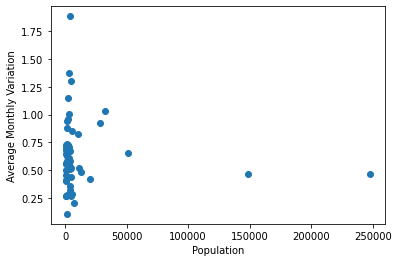

In [82]:
plt.scatter(list(pop_vary.keys()),list(pop_vary.values()))
plt.xlabel('Population')
plt.ylabel('Average Monthly Variation')

# Scatterplot of relation between population and average gw level

Text(0, 0.5, 'Average Groundwater Level')

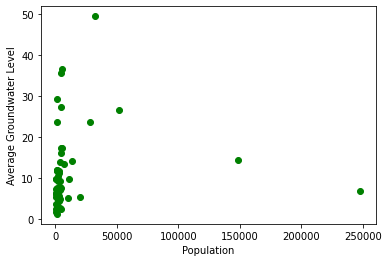

In [83]:
plt.scatter(list(pop_avg.keys()),list(pop_avg.values()),color='green')
plt.xlabel('Population')
plt.ylabel('Average Groundwater Level')


In [80]:
# fulltest_x.loc[fulltest_x['Alluvium']>=0, 'Alluvium'] = 1
# fulltest_x.loc[fulltest_x['Basalt'] >=0, 'Basalt'] = 0
# fulltest_x.loc[fulltest_x['Laterite'] >=, 'Laterite'] = 0
# fulltest_x.loc[fulltest_x['Limestone'] >=0, 'Limestone'] = 0
# fulltest_x.loc[fulltest_x['Sandstone_conglomerate'] >=0, 'Sandstone_conglomerate'] = 0
# fulltest_x.loc[fulltest_x['Shale'] >=0, 'Shale'] = 0


# Permuatation of features for explaining cause-effect relation

## Effects of change in aquifer type

left(will result in decrease of gw level) ---> right (will result in increase of gw level)

sandstone -> shale -> basalt -> laterite -> Limestone -> alluvium

In [42]:
fulltest_x.loc[fulltest_x['Alluvium']>=0, 'Alluvium'] = 1
fulltest_x.loc[fulltest_x['Basalt'] >=0, 'Basalt'] = 0
fulltest_x.loc[fulltest_x['Laterite'] >=0, 'Laterite'] = 0
fulltest_x.loc[fulltest_x['Limestone'] >=0, 'Limestone'] = 0
fulltest_x.loc[fulltest_x['Sandstone_conglomerate'] >=0, 'Sandstone_conglomerate'] = 0
fulltest_x.loc[fulltest_x['Shale'] >=0, 'Shale'] = 0

alluypred=reg.predict(fulltest_x)

print(np.mean(np.array(ypred)-np.array(alluypred)))

1.4192693607038125


In [43]:
fulltest_x.loc[fulltest_x['Alluvium']>=0, 'Alluvium'] = 0
fulltest_x.loc[fulltest_x['Basalt'] >=0, 'Basalt'] = 1
fulltest_x.loc[fulltest_x['Laterite'] >=0, 'Laterite'] = 0
fulltest_x.loc[fulltest_x['Limestone'] >=0, 'Limestone'] = 0
fulltest_x.loc[fulltest_x['Sandstone_conglomerate'] >=0, 'Sandstone_conglomerate'] = 0
fulltest_x.loc[fulltest_x['Shale'] >=0, 'Shale'] = 0

basaltypred=reg.predict(fulltest_x)

print(np.mean(np.array(ypred)-np.array(basaltypred)))

0.9538304025593172


In [44]:
fulltest_x.loc[fulltest_x['Alluvium']>=0, 'Alluvium'] = 0
fulltest_x.loc[fulltest_x['Basalt'] >=0, 'Basalt'] = 0
fulltest_x.loc[fulltest_x['Laterite'] >=0, 'Laterite'] = 1
fulltest_x.loc[fulltest_x['Limestone'] >=0, 'Limestone'] = 0
fulltest_x.loc[fulltest_x['Sandstone_conglomerate'] >=0, 'Sandstone_conglomerate'] = 0
fulltest_x.loc[fulltest_x['Shale'] >=0, 'Shale'] = 0

latypred=reg.predict(fulltest_x)

print(np.mean(np.array(ypred)-np.array(latypred)))

1.3873985475873103


In [45]:
fulltest_x.loc[fulltest_x['Alluvium']>=0, 'Alluvium'] = 0
fulltest_x.loc[fulltest_x['Basalt'] >=0, 'Basalt'] = 0
fulltest_x.loc[fulltest_x['Laterite'] >=0, 'Laterite'] = 0
fulltest_x.loc[fulltest_x['Limestone'] >=0, 'Limestone'] = 1
fulltest_x.loc[fulltest_x['Sandstone_conglomerate'] >=0, 'Sandstone_conglomerate'] = 0
fulltest_x.loc[fulltest_x['Shale'] >=0, 'Shale'] = 0

limeypred=reg.predict(fulltest_x)

print(np.mean(np.array(ypred)-np.array(limeypred)))

1.4144545699813384


In [46]:
fulltest_x.loc[fulltest_x['Alluvium']>=0, 'Alluvium'] = 0
fulltest_x.loc[fulltest_x['Basalt'] >=0, 'Basalt'] = 0
fulltest_x.loc[fulltest_x['Laterite'] >=0, 'Laterite'] = 0
fulltest_x.loc[fulltest_x['Limestone'] >=0, 'Limestone'] = 0
fulltest_x.loc[fulltest_x['Sandstone_conglomerate'] >=0, 'Sandstone_conglomerate'] = 1
fulltest_x.loc[fulltest_x['Shale'] >=0, 'Shale'] = 0

sandypred=reg.predict(fulltest_x)

print(np.mean(np.array(ypred)-np.array(sandypred)))

-2.380628527859237


In [47]:
fulltest_x.loc[fulltest_x['Alluvium']>=0, 'Alluvium'] = 0
fulltest_x.loc[fulltest_x['Basalt'] >=0, 'Basalt'] = 0
fulltest_x.loc[fulltest_x['Laterite'] >=0, 'Laterite'] = 0
fulltest_x.loc[fulltest_x['Limestone'] >=0, 'Limestone'] = 0
fulltest_x.loc[fulltest_x['Sandstone_conglomerate'] >=0, 'Sandstone_conglomerate'] = 0
fulltest_x.loc[fulltest_x['Shale'] >=0, 'Shale'] = 1

shaleypred=reg.predict(fulltest_x)

print(np.mean(np.array(ypred)-np.array(shaleypred)))

0.7158021029058917


In [ ]:
fulltest_x.describe()

## Effect of change in soil type

left(will result in decrease of gw level) ---> right (will result in increase of gw level)

Loamy Clay -> Rocky -> Sandy clay -> Sand

In [50]:
fulltest_x.loc[fulltest_x['Clay']>=0, 'Clay'] = 1
fulltest_x.loc[fulltest_x['Loam'] >=0, 'Loam'] = 0
fulltest_x.loc[fulltest_x['Rocky'] >=0, 'Rocky'] = 0
fulltest_x.loc[fulltest_x['Sand'] >=0, 'Sand'] = 0


clayypred=reg.predict(fulltest_x)

print(np.mean(np.array(ypred)-np.array(clayypred)))

0.1925891634230872


In [51]:
fulltest_x.loc[fulltest_x['Clay']>=0, 'Clay'] = 0
fulltest_x.loc[fulltest_x['Loam'] >=0, 'Loam'] = 1
fulltest_x.loc[fulltest_x['Rocky'] >=0, 'Rocky'] = 0
fulltest_x.loc[fulltest_x['Sand'] >=0, 'Sand'] = 0


loamypred=reg.predict(fulltest_x)

print(np.mean(np.array(ypred)-np.array(loamypred)))

-0.919956462809917


In [52]:
fulltest_x.loc[fulltest_x['Clay']>=0, 'Clay'] = 0
fulltest_x.loc[fulltest_x['Loam'] >=0, 'Loam'] = 0
fulltest_x.loc[fulltest_x['Rocky'] >=0, 'Rocky'] = 1
fulltest_x.loc[fulltest_x['Sand'] >=0, 'Sand'] = 0


rockypred=reg.predict(fulltest_x)

print(np.mean(np.array(ypred)-np.array(rockypred)))

0.06473318261796851


In [53]:
fulltest_x.loc[fulltest_x['Clay']>=0, 'Clay'] = 0
fulltest_x.loc[fulltest_x['Loam'] >=0, 'Loam'] = 0
fulltest_x.loc[fulltest_x['Rocky'] >=0, 'Rocky'] = 0
fulltest_x.loc[fulltest_x['Sand'] >=0, 'Sand'] = 1


sandypred=reg.predict(fulltest_x)

print(np.mean(np.array(ypred)-np.array(sandypred)))

0.30306968168488424


## Effect of change in soil depth

left(will result in decrease of gw level) ---> right (will result in increase of gw level)

50 -> 37 -> 17 -> 10

In [88]:
fulltest_x.loc[fulltest_x['SD_10.0']>=0, 'SD_10.0'] = 1
fulltest_x.loc[fulltest_x['SD_17.5'] >=0, 'SD_17.5'] = 0
fulltest_x.loc[fulltest_x['SD_37.5'] >=0, 'SD_37.5'] = 0
fulltest_x.loc[fulltest_x['SD_50.0'] >=0, 'SD_50.0'] = 0


sd10ypred=reg.predict(fulltest_x)

print(np.mean(np.array(ypred)-np.array(sd10ypred)))

1.0309642516662223


In [89]:
fulltest_x.loc[fulltest_x['SD_10.0']>=0, 'SD_10.0'] = 0
fulltest_x.loc[fulltest_x['SD_17.5'] >=0, 'SD_17.5'] = 1
fulltest_x.loc[fulltest_x['SD_37.5'] >=0, 'SD_37.5'] = 0
fulltest_x.loc[fulltest_x['SD_50.0'] >=0, 'SD_50.0'] = 0


sd17ypred=reg.predict(fulltest_x)

print(np.mean(np.array(ypred)-np.array(sd17ypred)))

1.1467220975739802


In [90]:
fulltest_x.loc[fulltest_x['SD_10.0']>=0, 'SD_10.0'] = 0
fulltest_x.loc[fulltest_x['SD_17.5'] >=0, 'SD_17.5'] = 0
fulltest_x.loc[fulltest_x['SD_37.5'] >=0, 'SD_37.5'] = 1
fulltest_x.loc[fulltest_x['SD_50.0'] >=0, 'SD_50.0'] = 0


sd37ypred=reg.predict(fulltest_x)

print(np.mean(np.array(ypred)-np.array(sd37ypred)))

0.7956084478805651


In [91]:
fulltest_x.loc[fulltest_x['SD_10.0']>=0, 'SD_10.0'] = 0
fulltest_x.loc[fulltest_x['SD_17.5'] >=0, 'SD_17.5'] = 0
fulltest_x.loc[fulltest_x['SD_37.5'] >=0, 'SD_37.5'] = 0
fulltest_x.loc[fulltest_x['SD_50.0'] >=0, 'SD_50.0'] = 1


sd50ypred=reg.predict(fulltest_x)

print(np.mean(np.array(ypred)-np.array(sd50ypred)))

-0.7503028419088245


In [153]:
model = tf.keras.Sequential([
      layers.Dense(128, activation='selu'),
      layers.Dense(64, activation='selu'),
      layers.Dense(1)
  ])

model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

# Result of Baseline NN model

In [151]:
from sklearn.metrics import r2_score
model.fit(basetrain_x,train_y,epochs=500,verbose=0)
yp=model.predict(basetest_x)
print("R2: ",r2_score(test_y.values.flatten(),yp.flatten()))
print("MSe: ",mean_squared_error(test_y.values.flatten(),yp.flatten()))
print("Corr: ",np.corrcoef(test_y.values.flatten(),yp.flatten()))

R2:  -0.18120041729637548
MSe:  112.9915428874335
Corr:  [[1.         0.33830071]
 [0.33830071 1.        ]]


# Result of full features NN model

In [154]:
from sklearn.metrics import r2_score
model.fit(fulltrain_x,train_y,epochs=500,verbose=0)
yp=model.predict(fulltest_x)
print("R2: ",r2_score(test_y.values.flatten(),yp.flatten()))
print("MSe: ",mean_squared_error(test_y.values.flatten(),yp.flatten()))
print("Corr: ",np.corrcoef(test_y.values.flatten(),yp.flatten()))


R2:  0.8939467512436275
MSe:  10.144866213843052
Corr:  [[1.         0.94653716]
 [0.94653716 1.        ]]


# plot of true vs predicted gw level values for full NN model

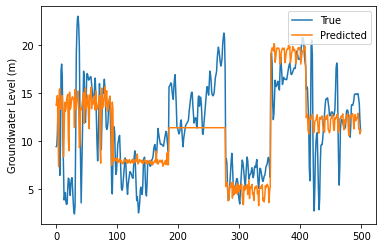

In [155]:
plt.plot(test_y.values.flatten()[:500])
plt.plot(yp[:500],)
plt.legend(["True", "Predicted"], loc ="upper right")
plt.ylabel('Groundwater Level (m)')
plt.show()